<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 02
## Clase 05: Análisis Exploratorio de Datos

## Objetivos

* Conocer los tipos de datos más comunes
* Aprender a tratar con datos _sucios_

## Contenidos
* [Motivación](#motivation)
* [CSV](#csv)
* [JSON](#json)
* [Pickle](#pickle)
* [API](#api)
* [Análiss Exploratorio de Datos](#eda)

<a id='motivation'></a>
## Motivación

Como ya hemos comentado en clases pasadas, hoy los datos son el centro de atención en el mundo tecnológico. Por lo mismo existe una amplia gama de tipos de datos lo cual conlleva a distintas formas de obtención y manipulación de estos datos. 

En la clase de hoy comenzaremos conociendo los tipos más comunes de datos para luego centrarnos en la obtención de datos a través de una __API__. Los ejemplos serán utilizando la API de DataChile.

In [2]:
import os
import numpy as np
import pandas as pd

<a id='csv'></a>
## CSV

Del inglés _Comma-Separated Values_, los archivos CSV utilizan comas (",") para separar valores y cada registro consiste de una fila. 

- Pros:
    * Livianos.
    * De fácil entendimiento.
    * Editables usando un editor de texto.
- Contras:
    * No está totalmente estandarizado (e.g. ¿Qué pasa si un valor tiene comas?)
    * Son sensible al _encoding_ (es la forma en que se codifica un carácter).
    
Pandas posee su propia función para leer csv: `pd.read_csv()`.

In [3]:
# Documentación
# pd.read_csv?

### Ejemplo de encoding incorrecto

In [4]:
pd.read_csv(os.path.join('data', 'encoding_example.csv'), sep=',', encoding='GBK')

,nombre,apellido,edad
0,Juan,P茅rez,12.0
1,Le贸n,Pardo,29.0
2,Jos茅,Nu帽ez,NaN


### Ejemplo de encoding correcto

In [5]:
pd.read_csv(os.path.join('data', 'encoding_example.csv'), sep=',', encoding='utf8')

,nombre,apellido,edad
0,Juan,Pérez,12.0
1,León,Pardo,29.0
2,José,Nuñez,NaN


<a id='json'></a>
## JSON

Acrónimo de _JavaScript Object Notation_, utilizado principalmente para intercambiar datos entre una aplicación web y un servidor.

- Pros:
    * Livianos.
    * De fácil entendimiento.
    * Editables usando un editor de texto.
    * Formato estandarizado.
- Contras:
    * La lectura con pandas puede ser un poco complicada.
    
Pandas posee su propia función para leer JSON: `pd.read_json()`.

In [6]:
# pd.read_json?

In [7]:
!head -n 10 data/json_example.json

{
  "integer": {
    "0": 5,
    "1": 5,
    "2": 9,
    "3": 6,
    "4": 6,
    "5": 9,
    "6": 7,
    "7": 1,


In [8]:
pd.read_json(
    os.path.join('data', 'json_example.json'),
    orient="columns"
).head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


<a id='pickle'></a>
## Pickle

Es un módulo que implementa protocolos binarios de serialización y des-serialización de objetos de Python.

* Pros
    - Puede representar una inmensa cantidad de tipos de objetos de python.
    - En un contexto de seguridad, como no es legible por el ser humano (representación binaria) puede ser útil para almacenar datos sensibles.
* Contras:
    - Solo Python.
    - Si viene de un tercero podría tener contenido malicioso.
    
Pandas posee su propia función para leer pickles: `pd.read_pickle()`.

In [9]:
# pd.read_pickle?

In [10]:
pd.read_pickle(os.path.join('data', 'nba.pkl')).head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


<a id='sql'></a>
## SQL

Conocimos las bases de datos relacionales SQL en elclases anteriores y como recordarás existe la función `pd.read_sql()`.

In [11]:
# pd.read_sql?

In [12]:
import sqlite3
connector = sqlite3.connect(os.path.join('data', 'chinook.db'))
pd.read_sql_query("select * from albums", con=connector).head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


<a id='api'></a>
## API

¿Has escuchado el término __API__? Fuera de todo tecnicismo, las APIs (_Application Programming Interface_) permiten hacer uso de funciones ya existentes en otro software (o de la infraestructura ya existente en otras plataformas) para no estar reinventando la rueda constantemente, reutilizando así código que se sabe que está probado y que funciona correctamente. Por ejemplo, cuando haces una compra online y utilizas WebPay. ¡Hay APIs en todos lados!

### Un buen ejemplo: Data Chile

Desde la web de [Data Chile](https://es.datachile.io):

- Ofrece una radiografía de las temáticas más importantes para el desarrollo del país.
- Ayuda a conocer tendencias y necesidades para el diseño e implementación de políticas públicas, programas de la sociedad civil, oportunidades de negocios y estrategias de marketing del sector privado.
- Colabora en la toma de decisiones tanto del sector público como privado.
- Integra información de más de 15 fuentes distintas pertenecientes a más de 10 organismos de Gobierno.
- Crea y combina visualizaciones interactivas.
- Piensa los datos como historias y no como archivos.


#### Denme todos los datos!
DataChile posee una API de datos que entrega la información para construir los gráficos y generar todos los textos del sitio. Todos los detalles en este [link](https://es.datachile.io/about/api).

In [13]:
from datachile import ChileCube

client = ChileCube()
cubes = client.get_cubes()

# Por ejemplo el primer cube Mortalidad
cubes[0]

{'name': 'mortality',
 'dimensions': [{'name': 'Date',
   'caption': 'Date',
   'type': 'standard',
   'annotations': {},
   'hierarchies': [{'name': 'Date',
     'has_all': True,
     'all_member_name': 'All Dates',
     'levels': [{'name': '(All)',
       'full_name': '[Date].[(All)]',
       'depth': 0,
       'caption': '(All)',
       'annotations': {},
       'properties': []},
      {'name': 'Year',
       'full_name': '[Date].[Year]',
       'depth': 1,
       'caption': 'Year',
       'annotations': {},
       'properties': []}]}]},
  {'name': 'Geography',
   'caption': 'Geography',
   'type': 'standard',
   'annotations': {'index_as': 'geo'},
   'hierarchies': [{'name': 'Geography',
     'has_all': True,
     'all_member_name': 'All Geographys',
     'levels': [{'name': '(All)',
       'full_name': '[Geography].[(All)]',
       'depth': 0,
       'caption': '(All)',
       'annotations': {},
       'properties': []},
      {'name': 'Region',
       'full_name': '[Geography].[

Me encantaría que pudiésemos utilizar la API en el curso, pero actualmente (2019-10-15) está con problemas.

In [14]:
import sys

try:
    query = client.get(
        "exports", 
        {
            "drilldowns": [
                ["Date", "Year"],
                ["Destination Country", "Country", "Country"]
            ],
            "measures": ["FOB US"],
            "cuts": [
                {
                    "drilldown": ["Date", "Year"],
                    "values": [2012, 2013, 2014]
                }
            ],
            "parents": True
        }
    )
except Exception as e:
    print(f"{type(e)}: {e}")

<class 'KeyError'>: 'axis_dimensions'


<a id='eda'></a>
## Análisis Exploratorio de Datos

El análisis exploratorio de datos es una forma de analizar datos definido por John W. Tukey (E.D.A.: Exploratory data analysis) es el tratamiento estadístico al que se someten las muestras recogidas durante un proceso de investigación en cualquier campo científico. Para mayor rapidez y precisión, todo el proceso suele realizarse por medios informáticos, con aplicaciones específicas para el tratamiento estadístico. 

### Checklist en el análisis exploratorio de datos

El análisis exploratorio de datos debería dar respuestas a las siguientes preguntas:

1. ¿Qué pregunta(s) estás tratando de resolver (o probar que estás equivocado)?
2. ¿Qué tipo de datos tiene y cómo trata los diferentes tipos?
3. ¿Qué falta en los datos y cómo los maneja?
4. ¿Qué hacer con los datos faltantes, outliers o información mal inputada?
5. ¿Se puede sacar más provecho a los datos ?


### Ejemplo: Datos de terremotos

El dataset `earthquakes.csv` contiene la información de los terremotos de los países durante el año 2000 al 2011. Debido a que la información de este dataset es relativamente fácil de trabajar, hemos creado un dataset denominado `earthquakes_contaminated.csv` que posee información contaminada en cada una de sus columnas. De esta forma se podrá ilustrar los distintos inconvenientes al realizar análisis exploratorio de datos.

In [15]:
pd.read_csv(os.path.join("data", "earthquakes.csv")).head()

,Año,Pais,Magnitud
0,2011,Turkey,7.1
1,2011,India,6.9
2,2011,Japan,7.1
3,2011,Burma,6.8
4,2011,Japan,9.0


In [16]:
earthquakes = pd.read_csv(os.path.join("data", "earthquakes_contaminated.csv"))
earthquakes.head()

,Año,Pais,Magnitud,Informacion
0,2000,Turkey,6,info no valiosa
1,2000,Turkmenistan,7,info no valiosa
2,2000,Azerbaijan,6.5,info no valiosa
3,2000,Azerbaijan,6.8,info no valiosa
4,2000,Papua New Guinea,8,info no valiosa


#### Variables

* __Pais__:
    - Descripción: País del devento sísmico.
    - Tipo: _string_
    - Observaciones: No deberían encontrarse nombres de ciudades, comunas, pueblos, estados, etc.
* Año:
    - Descripción: Año del devento sísmico.
    - Tipo: _integer_
    - Observaciones: Los años deben estar entre 2000 y 2011.
* Magnitud:
    - Descripción: Magnitud del devento sísmico medida en [Magnitud de Momento Sísmico](https://en.wikipedia.org/wiki/Moment_magnitude_scale).
    - Tipo: _float_
    - Observaciones: Magnitudes menores a 9.6.
* Informacion:
    - Descripción: Columna contaminante.
    - Tipo: _string_
    - Observaciones: A priori pareciera que no entrega información a los datos.

A pesar que la magnitud es un _float_, el conocimiento de los datos nos da información relevante, pues el terremoto con mayor magnitud registrado a la fecha fue el de Valdivia, Chile el 22 de mayo de 1960 con una magnitud entre 9.4 - 9.6. 

__Los datos son solo bytes en el disco duro si no se le entregan valor y conocimiento.__

### 1. ¿Qué pregunta(s) estás tratando de resolver (o probar que estás equivocado)?

A modo de ejemplo, consideremos que que queremos conocer la mayor magnitud de terremoto en cada país a lo largo de los años.

### 2. ¿Qué tipo de datos tiene y cómo trata los diferentes tipos?

Por el conocimiento de los datos sabemos que `Pais` e `Información` son variables categóricas, mientras que `Año` y `Magnitud` son variables numéricas.

Utilizemos las herramientas que nos entrega `pandas`.

In [17]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
Año            226 non-null object
Pais           226 non-null object
Magnitud       225 non-null object
Informacion    220 non-null object
dtypes: object(4)
memory usage: 7.2+ KB


In [18]:
earthquakes.describe(include="all").T

,count,unique,top,freq
Año,226,16,2003,31
Pais,226,74,Indonesia,27
Magnitud,225,45,6.4,14
Informacion,220,3,info valiosa,166


In [19]:
earthquakes.dtypes

Año            object
Pais           object
Magnitud       object
Informacion    object
dtype: object

Todas las columnas son de tipo `object`, sospechoso. Además, algunas no tienen datos.

__Tip__: Típicamente se utilizan nombres de columnas en minúsculas y sin espacios. Un truco es hacer lo siguiente:

In [20]:
earthquakes = earthquakes.rename(columns=lambda x: x.lower().strip())
earthquakes.head()

,año,pais,magnitud,informacion
0,2000,Turkey,6,info no valiosa
1,2000,Turkmenistan,7,info no valiosa
2,2000,Azerbaijan,6.5,info no valiosa
3,2000,Azerbaijan,6.8,info no valiosa
4,2000,Papua New Guinea,8,info no valiosa


Se le aplicó una función `lambda` a cada nombre de columna! Puum! 

### 3. ¿Qué falta en los datos y cómo los maneja?

No es necesario agregar más variables, pero si procesarla.

### 4. ¿Qué hacer con los datos faltantes, outliers o información mal inputada?

A continuación iremos explorando cada una de las columnas.

In [21]:
for col in earthquakes:
    print(f"La columna {col} posee los siguientes valores únicos:\n {earthquakes[col].sort_values().unique()}\n\n")

La columna año posee los siguientes valores únicos:
 ['1990' '1997' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' 'dos mil uno' nan]


La columna pais posee los siguientes valores únicos:
 ['Afghanistan' 'Afghanistan ' 'Algeria' 'Algeria ' 'Argentina'
 'Azerbaijan' 'Azerbaijan ' 'Bangladesh' 'Burma ' 'Chile' 'Chile ' 'China'
 'China ' 'Colombia' 'Costa Rica' 'Costa Rica '
 'Democratic Republic of the Congo' 'Democratic Republic of the Congo '
 'Dominican Republic' 'Ecuador' 'El Salvador ' 'Greece' 'Greece '
 'Guadeloupe' 'Guatemala' 'Haiti ' 'India' 'India ' 'Indonesia'
 'Indonesia ' 'Iran' 'Iran ' 'Iran, 2005 Qeshm earthquake' 'Italy'
 'Italy ' 'Japan' 'Japan ' 'Kazakhstan' 'Kyrgyzstan ' 'Martinique'
 'Mexico ' 'Morocco' 'Morocco ' 'Mozambique' 'New Zealand' 'New Zealand '
 'Nicaragua' 'Pakistan' 'Pakistan ' 'Panama' 'Papua New Guinea' 'Peru'
 'Peru ' 'Philippines' 'Russian Federation' 'Rwanda' 'Samoa ' 'Serbia'
 'Slovenia' 'Solomon Island

* En la columna `año` se presentan las siguientes anomalías:
    * Datos vacíos.
    * Años sin importancia: Se ha establecido que los años de estudios son desde el año 2000 al 2011.
    * Nombres mal escritos: en este caso sabemos que 'dos mil uno' corresponde a '2001'.
* En la columna `pais` se presentan las siguientes anomalías:
    * Datos vacíos.
    * Ciudades, e.g. _arica_.
    * Países mal escritos e.g. _shile_.
    * Países repetidos pero mal formateados, e.g. _Turkey_.
    * Cruce de información, e.g. _Iran, 2005 Qeshm earthquake_.
* En la columna `magnitud` se presentan las siguientes anomalías:
    * Datos vacíos.
    * Cruce de información, e.g. _2002-Tanzania-5.8_.
    * Valores imposibles, e.g. _9.7_.
* La columna `informacion` realmente no está entregando ninguna información valiosa al problema.

Partamos por eliminar la columna `informacion`.

In [22]:
eqk = earthquakes.drop(columns="informacion")  # A veces es importante no sobrescribir el dataframe original para realizar análisis posteriores.
eqk.head()

,año,pais,magnitud
0,2000,Turkey,6
1,2000,Turkmenistan,7
2,2000,Azerbaijan,6.5
3,2000,Azerbaijan,6.8
4,2000,Papua New Guinea,8


In [60]:
eqk = earthquakes.drop(columns="informacion").values
type(eqk)


numpy.ndarray

Respecto a la columna `año`, corregir estos errores no es difícil, pero suele ser tedioso. Aparte que si no se realiza un correcto análisis es posible no detectar estos errores a tiempo. Empecemos con los registros nulos.

In [23]:
eqk.loc[lambda x: x["año"].isnull()]

,año,pais,magnitud
225,NaN,NaN,2002-Tanzania-5.8
226,NaN,NaN,2003-japan-8.5


Veamos el archivo

In [24]:
! sed  -n "226,228p" data/earthquakes_contaminated.csv

1999,Haiti ,6.8,
,,2002-Tanzania-5.8,
,,2003-japan-8.5,


Toda la información está contenida en una columna!

Para editar la información usaremos dos herramientas:
 * Los métodos de `str` en `pandas`, en particular para dividir una columna.
 * `loc` para asignar los nuevos valores.

In [25]:
eqk.loc[lambda x: x["año"].isnull(), "magnitud"].str.split("-", expand=True).values

array([['2002', 'Tanzania', '5.8'],
       ['2003', 'japan', '8.5']], dtype=object)

In [26]:
eqk.loc[lambda x: x["año"].isnull(), :] = eqk.loc[lambda x: x["año"].isnull(), "magnitud"].str.split("-", expand=True).values

In [27]:
eqk.loc[[225, 226]]

,año,pais,magnitud
225,2002,Tanzania,5.8
226,2003,japan,8.5


Ahora los registros que no se pueden convertir a `numeric`. Veamos que no es posible convertirlo.

In [28]:
try:
    eqk["año"].astype(np.int)
except Exception as e:
    print(e)

invalid literal for int() with base 10: 'dos mil uno'


In [29]:
eqk["año"].str.isnumeric().fillna(False)

0      True
1      True
2      True
3      True
4      True
       ... 
223    True
224    True
225    True
226    True
227    True
Name: año, Length: 228, dtype: bool

In [30]:
eqk.loc[lambda x: ~ x["año"].str.isnumeric()]

,año,pais,magnitud
31,dos mil uno,China,5.4


Veamos el valor a cambiar

In [31]:
eqk.loc[lambda x: ~ x["año"].str.isnumeric(), "año"].iloc[0]

'dos mil uno'

Reemplazar es muy fácil!

In [32]:
eqk["año"].str.replace("dos mil uno", "2001")

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
223    1990
224    1999
225    2002
226    2003
227    2005
Name: año, Length: 228, dtype: object

Para asignar en el dataframe basta con:

In [33]:
eqk["año"] = eqk["año"].str.replace("dos mil uno", "2001").astype(np.int)

La forma encadenada sería:

In [34]:
# eqk["año"] = eqk.assign(año=lambda x: x["año"].str.replace("dos mil uno", "2001").astype("int"))

In [35]:
eqk.dtypes

año          int64
pais        object
magnitud    object
dtype: object

Finalmentem, filtremos los años necesarios:

In [36]:
eqk = eqk.query("2000 <= año <= 2011")

Siguiendo de forma análoga con la columna `magnitud`.

In [37]:
eqk.loc[lambda x: x["magnitud"].isnull()]

,año,pais,magnitud
219,2010,Colombia,NaN
220,2005,Indonesia,NaN
221,2010,Venezuela,NaN


La verdad es que no hay mucho que hacer con estos valores, por el momento no _inputaremos_ ningún valor y los descartaremos.

In [38]:
eqk = eqk.loc[lambda x: x["magnitud"].notnull()]

In [39]:
try:
    eqk["magnitud"].astype(np.float)
    print("Ya es posible transformar la columna a float.")
except:
    print("Aún no es posible transformar la columna a float.")

Ya es posible transformar la columna a float.


In [40]:
eqk = eqk.astype({"magnitud": np.float})

In [41]:
eqk.dtypes

año           int64
pais         object
magnitud    float64
dtype: object

In [42]:
eqk.magnitud.unique()

array([  6. ,   7. ,   6.5,   6.8,   8. ,   5.7,   6.4,   5.5,   6.3,
         5.4,   6.1,   6.7,   7.9,   7.2,   7.5,   5.3,   5.9,   9.7,
         5.8,   4.7,   7.6,   8.4,   5. ,   5.6,   6.6,   6.2,   7.1,
         7.3,   5.1,   5.2,   8.3,   6.9,   9.1,   4.9,   7.8,   8.6,
         7.7,   7.4,   8.5,   8.1,   8.8,   9. , -10. ])

In [43]:
eqk.query("magnitud < 0 or 9.6 < magnitud")

,año,pais,magnitud
22,2000,shile,9.7
217,2011,shile,-10.0
218,2011,shile,-10.0


In [44]:
eqk = eqk.query("0 <= magnitud <= 9.6")

In [45]:
eqk.query("magnitud < 0 or 9.6 < magnitud")

,año,pais,magnitud


Finalmente, para la columna `pais`. Comenzaremos con los nombres erróneos, estos los podemos mapear directamente.

In [46]:
map_paises = {"arica": "Chile", "shile": "Chile", "Iran, 2005 Qeshm earthquake": "Iran"}
eqk["pais"].map(map_paises).fillna(eqk["pais"])

0                Turkey
1          Turkmenistan
2            Azerbaijan
3           Azerbaijan 
4      Papua New Guinea
             ...       
215              China 
216        New Zealand 
225            Tanzania
226               japan
227               Chile
Name: pais, Length: 219, dtype: object

Para editarlo en el dataframe basta hacer un `assign`.

In [47]:
eqk = eqk.assign(pais=lambda x: x["pais"].map(map_paises).fillna(x["pais"]))

Ahora formatearemos los nombres, pasándolos a minúsculas y quitando los espacios al principio y final de cada _string_. Y ahabíamos hablado del ejemplo de _Turkey_.

In [48]:
eqk.loc[lambda x: x["pais"].apply(lambda s: "Turkey" in s), "pais"].unique()

array(['Turkey', 'Turkey '], dtype=object)

In [49]:
# Chaining method
eqk = eqk.assign(pais=lambda x: x["pais"].str.lower().str.strip())

In [50]:
eqk.loc[lambda x: x["pais"].apply(lambda s: "turkey" in s), "pais"].unique()

array(['turkey'], dtype=object)

Nota que no hay países con valores nulos porque ya fueron reparados.

In [51]:
eqk.query("pais.isnull()")

,año,pais,magnitud


In [52]:
earthquakes.query("pais.isnull()")

,año,pais,magnitud,informacion
225,NaN,NaN,2002-Tanzania-5.8,NaN
226,NaN,NaN,2003-japan-8.5,NaN


### 5. ¿Se puede sacar más provecho a los datos ?

No es posible crear variables nuevas o algo por el estilo, ya se hizo todo el procesamiento necesario para cumplir las reglas de negocio.

In [53]:
earthquakes.shape

(228, 4)

In [54]:
eqk.shape

(219, 3)

### Finalmente, responder la pregunta.

Como es un método de agregación podríamos simplemente hacer un `groupby`.

In [55]:
eqk.groupby(["pais", "año"])["magnitud"].max()

pais           año 
afghanistan    2000    6.3
               2001    5.0
               2002    7.3
               2003    5.8
               2004    6.5
                      ... 
turkmenistan   2000    7.0
united states  2001    6.8
               2003    6.6
venezuela      2006    5.5
vietnam        2005    5.3
Name: magnitud, Length: 134, dtype: float64

Sin embargo, en ocasiones, una tabla __pivoteada__ es mucho más explicativa.

In [56]:
eqk.pivot_table(
    index="pais",
    columns="año",
    values="magnitud",
    aggfunc="max",
    fill_value=""
)

año,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
pais,,,,,,,,,,,,
afghanistan,6.3,5,7.3,5.8,6.5,6.5,,,,,,
algeria,5.7,,,6.8,,,5.2,,5.5,,,
argentina,7.2,,,,6.1,,,,,,,
azerbaijan,6.8,,,,,,,,,,,
bangladesh,,,,5.6,,,,,,,,
burma,,,,,,,,,,,,6.8
chile,,6.3,,,,8,,7.7,,,8.8,
china,5.9,5.6,5.5,6.3,5.3,5.2,5,6.1,7.9,5.7,6.9,5.4
colombia,6.5,,,,,,,,5.9,,,


¿Notas las similitudes con `groupby`? Ambos son métodos de agregación, pero retornan formas de la matriz distintas.

Sin embargo, esto se vería mucho mejor con una visualización, que es lo que veremos en el próximo módulo.

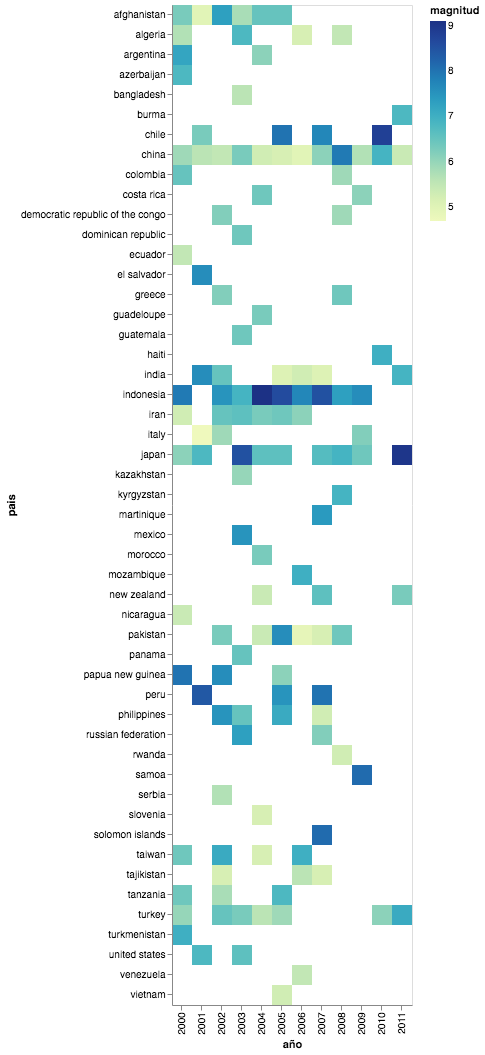

In [57]:
import altair as alt
alt.themes.enable('opaque')

alt.Chart(
    eqk.groupby(["pais", "año"])["magnitud"].max().reset_index()
).mark_rect().encode(
    x='año:O',
    y='pais:N',
    color='magnitud:Q'
)

### Conclusión del caso

* El análisis exploratorio de datos (EDA) es una metodología que sirve para asegurarse de la calidad de los datos.
* A medida que se tiene más expertice en el tema, mejor es el análisis de datos y por tanto, mejor son los resultados obtenidos.
* No existe un procedimiento estándar para realizar el EDA, pero siempre se debe tener claro el problema a resolver.

Es importante tener en mente lo que se quiere resolver, el cómo, el motivo y las posibles limitancias que puede tener la muestra obtenida (datos perdidos, ouliers, etc.).
